In [10]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from datetime import datetime as dt

from sklearn.cluster import KMeans
from sklearn import cluster_distance
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
import math

Populating the interactive namespace from numpy and matplotlib


Используем датасет NBA

In [11]:
df = pd.read_csv('./nba2k20-full.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


In [12]:
# распределение рейтинга на категории

def category_by_rating(rating):
    # 67 to 97
    if rating > 91:
        return 1
    elif rating > 85:
        return 2
    elif rating > 79:
        return 3
    elif rating > 73:
        return 4
    else:
        return 5

# вычисление возроста
start_day = dt.strptime('01/01/21', '%d/%m/%y')
def age_by_bdate(bdate):
    date = dt.strptime(bdate, '%m/%d/%y')
    dif = start_day - date
    return int(dif.days / 365.2425)

df.replace('', np.nan, inplace=True)
df.dropna()
df.head()

new_df = pd.DataFrame()
new_df['height'] = df['height'].map(lambda s: s.split('/')[1][1:]).astype(float)
new_df['age'] = df['b_day'].apply(age_by_bdate)
new_df['salary'] = df['salary'].apply(lambda s: int(s[1:]))
new_df['rating_category'] = df['rating'].apply(category_by_rating)
new_df.head()

,height,age,salary,rating_category
0,2.06,36,37436858,1
1,2.01,29,32742000,1
2,2.11,26,25842697,1
3,2.08,32,37199000,1
4,1.96,31,38199000,1


In [13]:
def dist(x, y):
    return math.sqrt(x ** 2 + y ** 2)

def cluster_distance(xs, ys, labels):
    assert len(xs) == len(ys)
    size = len(xs)
    inner = 0
    ins = 0
    outs = 0
    outer = 0
    for i in range(0, size):
        for j in range(i + 1, size):
            if labels[i] == labels[j] and labels[i]:
                inner += dist(xs[i] - xs[j], ys[i] - ys[j])
                ins += 1
            if labels[i] != labels[j]:
                outer += dist(xs[i] - xs[j], ys[i] - ys[j])
                outs += 1
    innerCluster = inner/ins
    outerCluster = outer/outs
    print("Среднее внутрикластерное расстояние:", innerCluster)
    print("Среднее межкластерное расстояние:", outerCluster)

Projecting 4-dimensional data to 2D


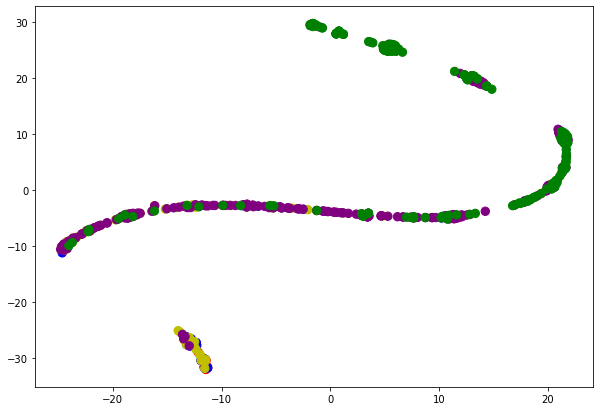

In [14]:
tsne = TSNE(n_components=2, random_state=42)

X_reduced = tsne.fit_transform(new_df)

colors = np.where(new_df['rating_category'] == 1, 'r', 
np.where(new_df['rating_category'] == 2, 'b', 
np.where(new_df['rating_category'] == 3, 'y', 
np.where(new_df['rating_category'] == 4, 'purple', 'g'))))

print('Projecting %d-dimensional data to 2D' % new_df.shape[1])

plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, s=70)
plt.show()

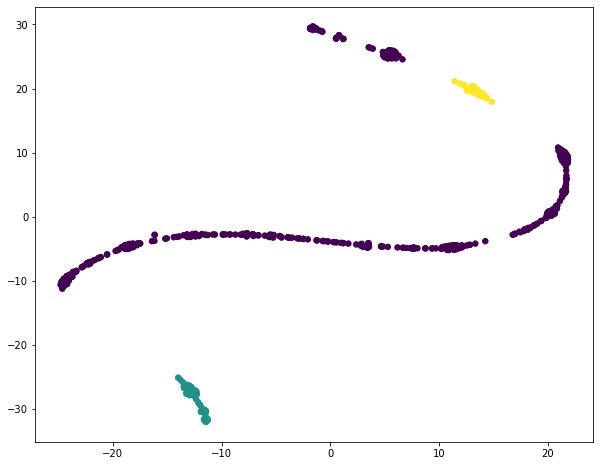

In [15]:
sc = SpectralClustering(n_clusters=3).fit(X_reduced)

plt.figure(figsize=(10,8))
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=30, c=sc.labels_)
plt.show()

In [16]:
cluster_distance(X_reduced[:,0], X_reduced[:,1], sc.labels_)

Среднее внутрикластерное расстояние: 2.1859003447491476
Среднее межкластерное расстояние: 33.78212852125795
